In [ ]:
# Visit this link to learn more about dmba package
# https://pypi.org/project/dmba/
#!pip install dmba

In [ ]:
#!pip install category_encoders

In [ ]:
#!pip install dmba

In [ ]:
"""
from dmba import regressionSummary, exhaustive_search
from dmba import backward_elimination
from dmba import forward_selection, stepwise_selection
from dmba import adjusted_r2_score, AIC_score, BIC_score
"""

In [ ]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import importlib
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.model_selection import cross_validate
from imblearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.metrics import roc_curve, auc

# noh,khodro
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge
from sklearn.linear_model import LassoCV, BayesianRidge
import statsmodels.formula.api as sm
import matplotlib.pyplot as plt
from scipy.stats import zscore



# yazdah,kolahbardari
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from category_encoders import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.dummy import DummyClassifier

In [ ]:
# === Core Python Libraries ===
import importlib
from pathlib import Path
import warnings

# === Data Manipulation and Visualization ===
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# === Statistical Analysis ===
from scipy.stats import zscore
import statsmodels.formula.api as sm

# === Scikit-learn: Model Selection & Evaluation ===
from sklearn.model_selection import (
    GridSearchCV,
    KFold,
    StratifiedKFold,
    cross_val_score,
    cross_validate,
    train_test_split,
)
from sklearn.metrics import (
    accuracy_score,
    auc,
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
)

# === Scikit-learn: Preprocessing & Utilities ===
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn import preprocessing
from sklearn.dummy import DummyClassifier

# === Scikit-learn: Models ===
from sklearn.linear_model import (
    BayesianRidge,
    Lasso,
    LassoCV,
    LinearRegression,
    LogisticRegression,
    Ridge,
    RidgeClassifier,
)
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# === Imbalanced Learning ===
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

# === Category Encoding ===
from category_encoders import OneHotEncoder

# === Miscellaneous Settings ===
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 11

Introduction: Business Problem

The Fraud Company is a company that specializes in detecting fraud in financial transactions made through mobile devices.

The company has a service called Blocker Fraud, which guarantees to block fraudulent transactions.

The company's business model is that the user pays a fixed fee to detect fraud in customer transactions.

* The company will receive 25% of the value of each transaction truly detected as fraud.
* The company will receive 5% of the value of each transaction detected as fraud but the transaction is legitimate.
* The company will return 100% of the value to the customer for each transaction detected as legitimate but it was actaully fraud.

Potential buseinss questions:
1. Can we classify the transactions as fraudulent or legitimate?
2. How reliable is the model in classifying transactions as legitimate or fraudulent?
3. What is the expected billing by the company if we classify 100% of transactions with the model?
4. What does the company expect to lose in case of model failure?
5. What is the profit expected by the Blocker Fraud Company when using the model?
6. What is the model's Precision and Accuracy?

Data Analytics Steps:

* **Step 01. Data Description**
* **tep 02. Feature Engineering**: explained below
* **Step 03. Data Filtering**: remove some columns or rows that are not part of the business. For example, if you have a customer, Id or a transaction id, those has nothing to impact the model, like a unique number or student id that they are not relevant to our model, so we need to filter or remove them.
* **Step 04. Exploratory Data Analysis**
* **Step 05. Data Preparation**: But sometimes the order between 5 and 6 are interchangeable.
* **Step 06. Feature Selection**
* **Step 07. Machine Learning Modeling**
* **Step 08. Hyperparameters Fine Tuning/Optimization**
* **Step 09. Conclusions**
* **Step 10. Model Deploy**

Feature Engineering => Keep in mind that the model should be built using only core, relevant features. You should exclude any features that are not related to the prediction task. If you encounter features that are highly correlated with each other, retain only one of them to avoid redundancy.

Additionally, it’s often beneficial to create new features from existing ones. For example, you might combine two features to derive a more informative one. While techniques like Principal Component Analysis (PCA) can help reduce dimensionality and create new features, they might not be ideal in business contexts, as the resulting components are difficult to interpret and explain in terms of business insights. Because of the following reasons:
1. PCA transforms our original features into principal components, which are linear combinations of the original variables. These new components don’t have a direct, intuitive meaning — they are just mathematical constructs that capture variance for example [PC1 = 0.6 * Age - 0.4 * Income + 0.7 * TransactionAmount], What does that mean in real-world terms? It’s not easy to say — it’s not just "Age" or "Income" anymore, it’s a mix of several things with no clear interpretation.
2. Business users often want to know why a model made a certain prediction — e.g., "Is fraud more likely because of a high transaction amount or unusual login location?" If we use PCA components, it's hard to provide such actionable insights because we can’t say: “This transaction was flagged because PC2 was high.”
3. In regulated industries like finance or healthcare, decision-making must be transparent and explainable. If we're using features that are hard to explain (like PCA components), it becomes a black-box model — which can lead to trust and compliance issues.
4. So while PCA is great for improving model performance or reducing dimensionality, it often comes at the cost of interpretability, which is critical for communicating results to non-technical stakeholders.

In [ ]:
fraud = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Fraud.csv')
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Fraud.csv')

In [ ]:
fraud.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [ ]:
fraud.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


In [ ]:
fraud.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

step: Represents a unit of time in the real world. In this dataset, one step equals one hour. The full simulation covers 744 steps (i.e., 30 days).

type: The type of transaction. Possible values are: CASH-IN, CASH-OUT, DEBIT, PAYMENT, and TRANSFER.

amount: The amount of the transaction in local currency.

nameOrig: The customer who initiated the transaction.

oldbalanceOrg: The balance of the originator’s account before the transaction.

newbalanceOrig: The balance of the originator’s account after the transaction.

nameDest: The customer who is the recipient of the transaction.

oldbalanceDest: The recipient’s account balance before the transaction. Note: Balance information is not available for recipients whose names begin with "M", which refers to merchants.

newbalanceDest: The recipient’s account balance after the transaction. Note: As above, this information is missing for merchants (names starting with "M").

isFraud: Indicates whether the transaction is fraudulent. In this dataset, fraudulent activity is simulated by agents who transfer funds between accounts and then attempt to cash out.

isFlaggedFraud: Indicates whether the transaction was flagged as suspicious. A transaction is flagged if it involves a transfer of more than 200,000 in a single transaction, as part of an attempt to detect large, potentially illegal movements of money.

In [ ]:
# Get summary statistics for numerical columns
fraud_transpose = fraud.describe().T
fraud_transpose[['min', '25%', '50%', '75%', 'max']].applymap(lambda x: '{:,.2f}'.format(x))

,min,25%,50%,75%,max
step,1.00,156.00,239.00,335.00,743.00
amount,0.00,"13,389.57","74,871.94","208,721.48","92,445,516.64"
oldbalanceOrg,0.00,0.00,"14,208.00","107,315.18","59,585,040.37"
newbalanceOrig,0.00,0.00,0.00,"144,258.41","49,585,040.37"
oldbalanceDest,0.00,0.00,"132,705.66","943,036.71","356,015,889.35"
newbalanceDest,0.00,0.00,"214,661.44","1,111,909.25","356,179,278.92"
isFraud,0.00,0.00,0.00,0.00,1.00
isFlaggedFraud,0.00,0.00,0.00,0.00,1.00


### Summary Insights from Statistical Description

**1. `step` (Time in hours):**  
- Ranges from 1 to 743, indicating a 30-day simulation with hourly intervals.  
- The median is 239, meaning half of all transactions occurred within the first 10 days.

**2. `amount`:**  
- Transaction amounts range from 0 to 92.4 million.  
- The median amount is approximately 74,872, indicating most transactions are significantly smaller than the maximum, suggesting a right-skewed distribution.

**3. `oldbalanceOrg` and `newbalanceOrig`:**  
- The median `newbalanceOrig` is 0, which may imply that many users got emptied their balance entirely after a transaction.
- `oldbalanceOrg` shows a wider distribution, indicating a range of account sizes from low to very high balances.

**4. `oldbalanceDest` and `newbalanceDest`:**  
- The 25th percentile for both is 0, suggesting that a significant number of recipient accounts had no prior balance.  
- However, the upper quantiles are very high, indicating the presence of large accounts, possibly merchants or institutions.

**5. `isFraud` and `isFlaggedFraud`:**  
- Both are binary (min = 0, max = 1).  
- The median is 0 for both, indicating that most transactions are non-fraudulent.  
- A deeper class balance check is recommended, as this likely reflects a high class imbalance, which is important for modeling.

**Additional Questions for Exploration:**  
- Why do so many transactions result in `newbalanceOrig = 0`?  
- Are large transactions more likely to be fraudulent?  
- Does fraud occur more frequently at specific time intervals (`step`)?  
- Why is `isFlaggedFraud` significantly lower than `isFraud`?


# Convert 1/0 to 'yes'/'no' for better readability. Map. Replace. Target

In [ ]:
# putting the original dataframe in a new variable to not change in order to use it later
fraud_org = fraud.copy()

# Convert 1/0 to 'yes'/'no' for better readability
fraud['isFraud'] = fraud['isFraud'].map({1: 'yes', 0: 'no'})
fraud['isFlaggedFraud'] = fraud['isFlaggedFraud'].map({1: 'yes', 0: 'no'})


In [ ]:
"""
# Optional: Use .replace() instead of .map() (works the same here)
fraud['isFraud'].replace({1: 'yes', 0: 'no'}, inplace=True)
fraud['isFlaggedFraud'].replace({1: 'yes', 0: 'no'}, inplace=True)
"""

In [ ]:
# Select numerical attributes (excluding object dtype)
num_attributes = fraud.select_dtypes(exclude='object')

# Select categorical attributes (only object dtype)
cat_attributes = fraud.select_dtypes(include='object')


In [ ]:
fraud.dtypes

,0
step,int64
type,object
amount,float64
nameOrig,object
oldbalanceOrg,float64
newbalanceOrig,float64
nameDest,object
oldbalanceDest,float64
newbalanceDest,float64
isFraud,object


In [ ]:
# Check for missing values
fraud.isnull().sum()

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,0
nameDest,0
oldbalanceDest,0
newbalanceDest,0
isFraud,0


In [ ]:
fraud.isnull().values.any()

np.False_

In [ ]:
fraud.shape

(6362620, 11)

In [ ]:
cat_attributes.describe().T

,count,unique,top,freq
type,6362620,5,CASH_OUT,2237500
nameOrig,6362620,6353307,C1530544995,3
nameDest,6362620,2722362,C1286084959,113
isFraud,6362620,2,no,6354407
isFlaggedFraud,6362620,2,no,6362604


Transaction Type Distribution: The most frequent transaction type is CASH_OUT, with a total of 224,216 occurrences.

High Cardinality in nameOrig: The nameOrig field has a high number of unique values, making it unsuitable for techniques like one-hot encoding due to potential dimensionality explosion.

Imbalance Between Senders and Receivers: There are fewer unique nameOrig (senders) compared to nameDest (receivers), indicating that users are more often on the receiving end. However, this imbalance makes one-hot encoding ineffective for both features.

Flagging vs Actual Fraud: There are more fraud cases (isFraud) than flagged cases (isFlaggedFraud), highlighting that the current fraud detection method may not be sufficiently effective in identifying fraudulent activity.

In [ ]:
# Get information about dataset structure
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         object 
 10  isFlaggedFraud  object 
dtypes: float64(5), int64(1), object(5)
memory usage: 534.0+ MB


# Feature Engineering

In [ ]:
# Convert step (in hours) into days and weeks
fraud['step_days'] = fraud['step'].apply(lambda i: i / 24)
fraud['step_weeks'] = fraud['step'].apply(lambda i: i / (24 * 7))

# Difference between initial balance and new balance after the transaction (sender)
fraud['diff_new_old_balance'] = fraud['newbalanceOrig'] - fraud['oldbalanceOrg']

# Difference between initial and new balance for the recipient
fraud['diff_new_old_destiny'] = fraud['newbalanceDest'] - fraud['oldbalanceDest']

# Simplify nameOrig and nameDest by extracting the first character (e.g., C or M)
fraud['nameOrig'] = fraud['nameOrig'].apply(lambda i: i[0])
fraud['nameDest'] = fraud['nameDest'].apply(lambda i: i[0])
fraud.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,step_days,step_weeks,diff_new_old_balance,diff_new_old_destiny
0,1,PAYMENT,9839.64,C,170136.0,160296.36,M,0.0,0.0,no,no,0.041667,0.005952,-9839.64,0.0
1,1,PAYMENT,1864.28,C,21249.0,19384.72,M,0.0,0.0,no,no,0.041667,0.005952,-1864.28,0.0
2,1,TRANSFER,181.00,C,181.0,0.00,C,0.0,0.0,yes,no,0.041667,0.005952,-181.00,0.0
3,1,CASH_OUT,181.00,C,181.0,0.00,C,21182.0,0.0,yes,no,0.041667,0.005952,-181.00,-21182.0
4,1,PAYMENT,11668.14,C,41554.0,29885.86,M,0.0,0.0,no,no,0.041667,0.005952,-11668.14,0.0


# selecting columns => we use all the columns

# Univariate Analysis
# Extreme high imbalanced in Target value. Class imbalanced.
# Countplot Response variable Target variable

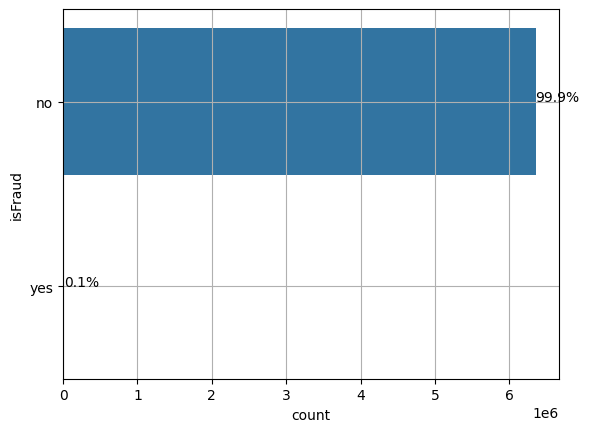

In [ ]:
# Countplot for isFraud with percentage annotations
ax = sns.countplot(y='isFraud', data=fraud)

# Total number of rows
total = fraud['isFraud'].size

# Annotate each bar with percentage
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_width() / total)
    x = p.get_x() + p.get_width() + 0.02
    y = p.get_y() + p.get_height() / 2
    ax.annotate(percentage, (x, y))

# Optional: add grid
plt.grid()
plt.show()

Our data somehow more legitimate transaction, which is normal things in real life, more financial transaction, are legitimate transactions.
But also it shows how unbalanced the target value is

In [ ]:
# Count legitimate and fraudulent transactions
legit = len(fraud_org[fraud_org.isFraud == 0])
frad = len(fraud_org[fraud_org.isFraud == 1])

# Calculate percentages
legit_percent = (legit / (frad + legit)) * 100
fraud_percent = (frad / (frad + legit)) * 100

# Display results
print("Number of Legit transactions: ", legit)
print("Number of Fraud transactions: ", frad)
print("Percentage of Legit transactions: {:.4f} %".format(legit_percent))
print("Percentage of Fraud transactions: {:.4f} %".format(fraud_percent))

Number of Legit transactions:  6354407
Number of Fraud transactions:  8213
Percentage of Legit transactions: 99.8709 %
Percentage of Fraud transactions: 0.1291 %


These results clearly indicate that the dataset is highly imbalanced, with **99.87%** of transactions being legitimate and only **0.13%** being fraudulent. This extreme class imbalance can significantly affect the performance of standard classification models, which may favor the majority class and fail to detect fraudulent cases effectively.

To address this challenge, algorithms such as **Decision Trees** and **Random Forests** are often preferred, as they can handle imbalanced data more robustly. When combined with techniques like **class weighting**, **SMOTE (Synthetic Minority Oversampling Technique)**, or **undersampling**, these models can be further optimized for detecting rare events like fraud.


# For Loop Sub Plots for each numerical columns start

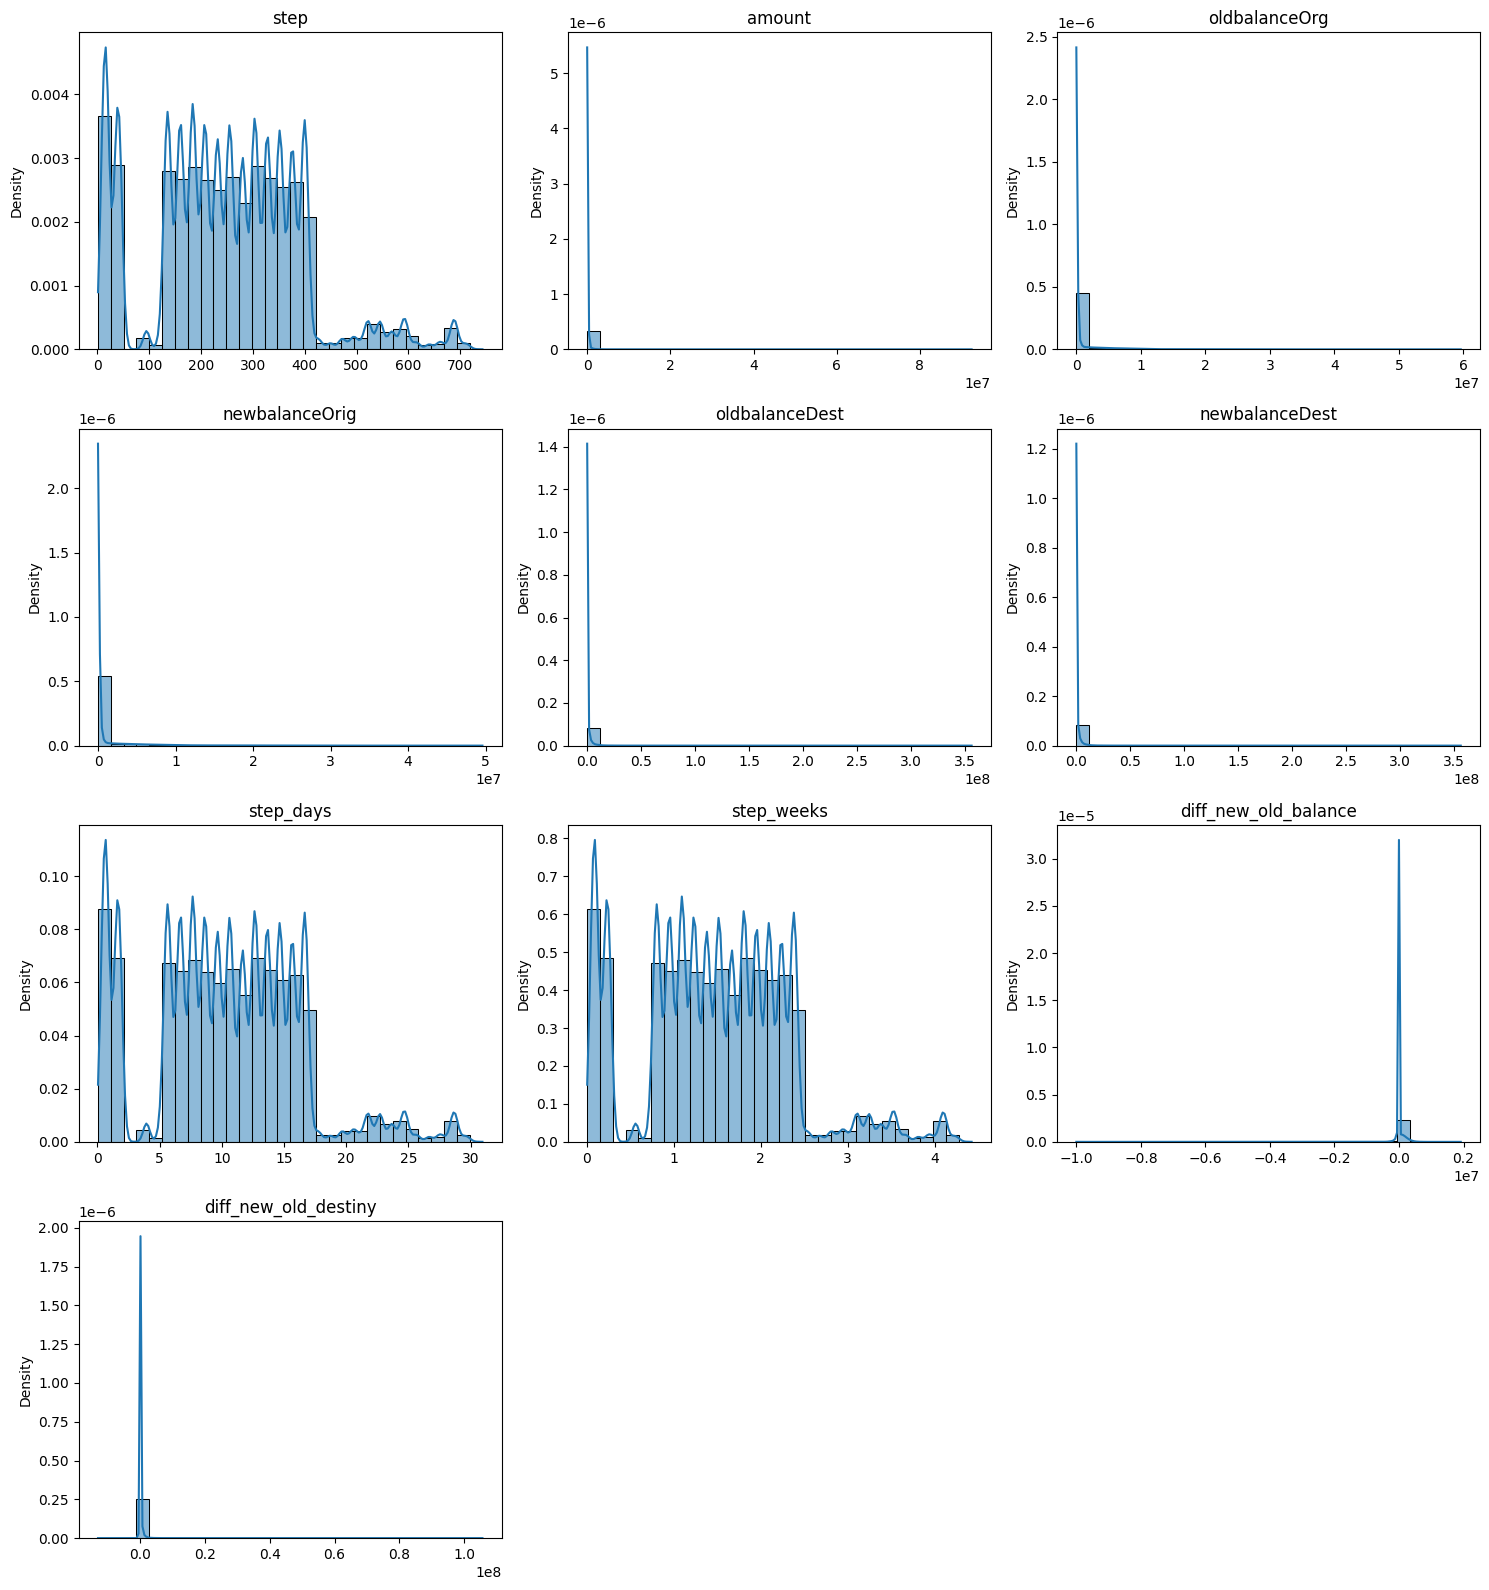

In [ ]:
# Select numerical attributes (excluding 'object' and 'isFraud')
num_attributes = fraud.select_dtypes(exclude='object')

num_cols = num_attributes.columns
cols = 3
rows = (len(num_cols) + cols - 1) // cols

plt.figure(figsize=(cols * 5, rows * 4))

for i, col in enumerate(num_cols, 1):
    plt.subplot(rows, cols, i)
    sns.histplot(fraud[col], kde=True, bins=30, stat='density')
    plt.title(col)
    plt.xlabel('')
    plt.ylabel('Density')

plt.tight_layout()
plt.show()


Business Interpretation of Numerical Feature Distributions
1. step, step_days, step_weeks

These features represent the time at which a transaction occurs. The distribution appears fairly uniform across the 30-day simulation, with a slight dip toward the end.
Business insight: Fraudulent or high-value transactions do not seem to be concentrated at a specific time. This may indicate that time-of-day or day-of-week alone is not a strong fraud indicator.
2. amount

The transaction amounts are heavily right-skewed: the vast majority are low-value, with a small number of very large transactions.
Business insight: Since fraud often involves large transfers, this skewness suggests that while most transactions are small, fraudulent activity might be hiding in high-value tails, which could require focused monitoring.
3. oldbalanceOrg and newbalanceOrig

These sender-side balance features are also extremely right-skewed. Many accounts have low or zero balance after sending money.
Business insight: Users often transfer their full balance or close to it, which may be a red flag in fraud scenarios. Emptying an account after a transfer might suggest fraud behavior.
4. oldbalanceDest and newbalanceDest

Similarly skewed, but with higher peaks around zero and very few large-value accounts.

Business insight: Many recipients receive funds into accounts that previously had zero balance, suggesting "clean" destination accounts — potentially used to launder or reroute funds in fraud cases.
5. diff_new_old_balance and diff_new_old_destiny

These features represent the difference in balances before and after the transaction. They are sharply peaked around 0, but with some extreme values.
Business insight: A large difference could signal unusual account activity. For example, if the destination balance doesn't change despite a large transfer, it might indicate money was rerouted or immediately withdrawn, which is suspicious behavior.

**Summary:**

Most users perform low-value transactions.

High-value transactions are rare, and potentially more suspicious.

Many accounts (sender and receiver) show zero balance after or before transactions, which can be useful red flags.

Balance difference features are valuable for identifying anomalies or incomplete transfers, which may help detect fraud more effectively.

# For Loop Sub Plots for each categorical columns start

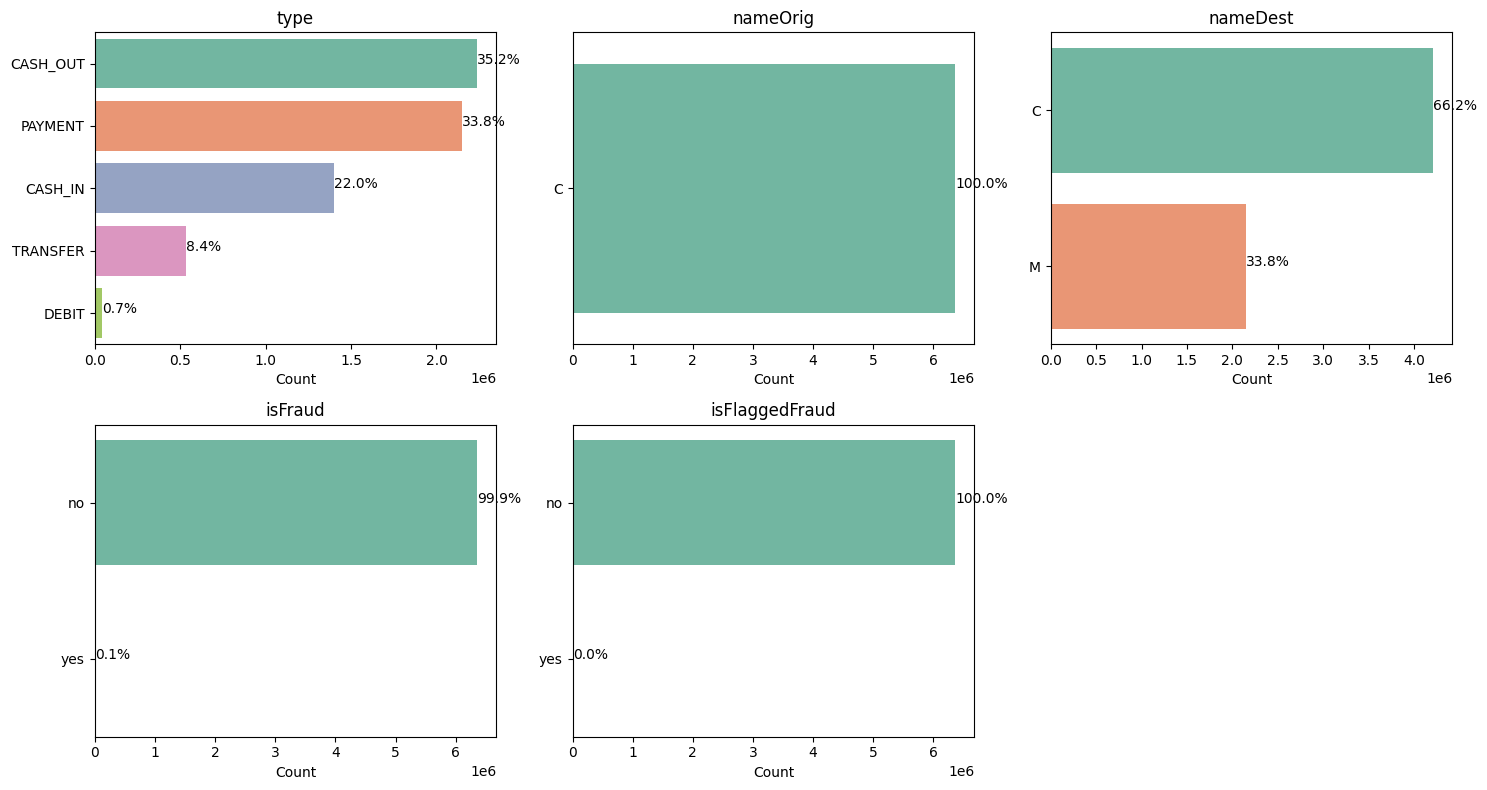

In [ ]:
# Select categorical attributes
cat_attributes = fraud.select_dtypes(include='object')

# Plot each categorical column in a subplot
cat_cols = cat_attributes.columns
n = len(cat_cols)
cols = 3
rows = (n + cols - 1) // cols

plt.figure(figsize=(cols * 5, rows * 4))

for i, col in enumerate(cat_cols, 1):
    plt.subplot(rows, cols, i)
    ax = sns.countplot(y=col, data=cat_attributes, order=cat_attributes[col].value_counts().index, palette='Set2')
    plt.title(col)
    plt.xlabel('Count')
    plt.ylabel('')

    # Annotate with percentages
    total = len(cat_attributes[col])
    for p in ax.patches:
        percent = '{:.1f}%'.format(100 * p.get_width() / total)
        x = p.get_width() + 0.02
        y = p.get_y() + p.get_height() / 2
        ax.annotate(percent, (x, y))

plt.tight_layout()
plt.show()


### Categorical Feature Distribution Insights

#### 1. `type` (Transaction Type)
- The most common transaction types are:
  - **CASH_OUT**: 35.2%
  - **PAYMENT**: 33.8%
  - **CASH_IN**: 22.0%
  - **TRANSFER**: 8.4%
  - **DEBIT**: 0.7%

**Business Insight**:  
CASH_OUT and PAYMENT dominate the transaction volume, suggesting these are standard customer operations. However, due to their volume, they require strong monitoring. TRANSFER transactions, while less frequent, are important as many fraudulent cases involve moving money between accounts.

#### 2. `nameOrig` (Sender Account Type)
- 100% of transactions originate from accounts labeled **C** (likely Customers).

**Business Insight**:  
Fraud tends to originate from **compromised customer accounts**, indicating that better customer-level security or activity monitoring is critical.

#### 3. `nameDest` (Recipient Account Type)
- 66.2% of recipients are **customers** (`C`)
- 33.8% are **merchants** (`M`)

**Business Insight**:  
A large portion of transactions go to merchant accounts. This may indicate **fraudsters posing as merchants** or using merchant accounts as temporary money sinks. Monitoring recipient type could help spot unusual activity.

#### 4. `isFraud`
- Only 0.1% of transactions are labeled as fraudulent.

**Business Insight**:  
The dataset is **highly imbalanced**, which is common in fraud detection. Most fraud is buried in legitimate transactions. Machine learning models must be trained using imbalance-aware techniques.

#### 5. `isFlaggedFraud`
- Almost 0% of transactions are flagged by the system.

**Business Insight**:  
The existing fraud detection system is **missing almost all fraudulent activity**. This highlights the need to develop **more effective, intelligent models**, possibly using decision trees, random forests, or anomaly detection.

### Summary:
- Fraud is more likely to occur during **TRANSFER** and **CASH_OUT** transactions.
- Merchant accounts (`M`) as recipients need additional scrutiny.
- The current fraud detection method is underperforming.
- Machine learning offers significant potential to improve fraud detection performance.


### Hypothesis: 60% of fraud transactions occur using the cash-out type method.

**FALSE**: The fraud transactions occur in both **TRANSFER** and **CASH_OUT** types. However, their percentages are very close, indicating that **fraud is equally likely in both transaction types**.

The visualization below confirms that both methods are commonly used in fraudulent activities.


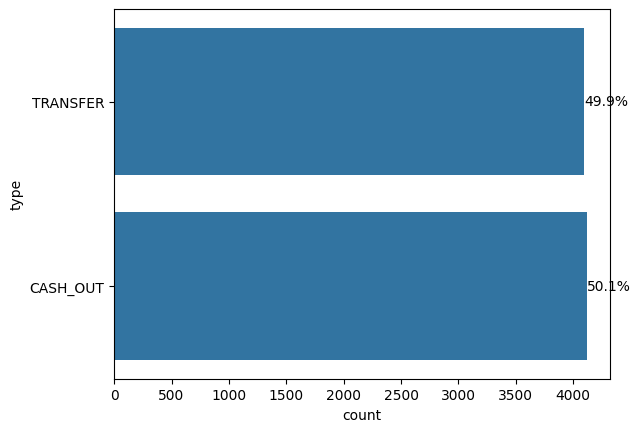

In [ ]:
# Filter fraud-only transactions
aux1 = fraud[fraud['isFraud'] == 'yes']

# Plot transaction types for fraud only
ax = sns.countplot(y='type', data=aux1)

# Add percentage annotations
total = aux1['type'].size
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_width() / total)
    x = p.get_x() + p.get_width() + 0.02
    y = p.get_y() + p.get_height() / 2
    ax.annotate(percentage, (x, y), va='center')


# Compute the correlation matrix For Numerical attributes

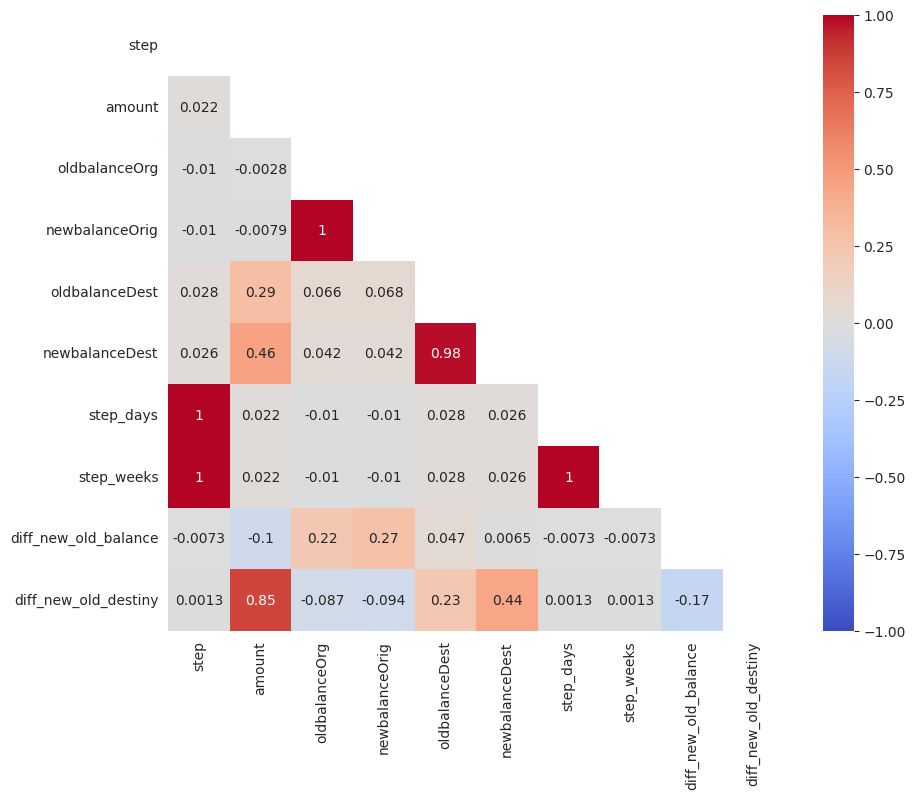

In [ ]:
# Compute the correlation matrix
corr = num_attributes.corr()

# Create a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Plot the heatmap
with sns.axes_style("white"):
    plt.figure(figsize=(10, 8))
    ax = sns.heatmap(
        corr,
        annot=True,
        mask=mask,
        vmin=-1,
        vmax=1,
        center=0,
        square=True,
        cmap="coolwarm"
    )

# Compute the correlation matrix For Categorical attributes

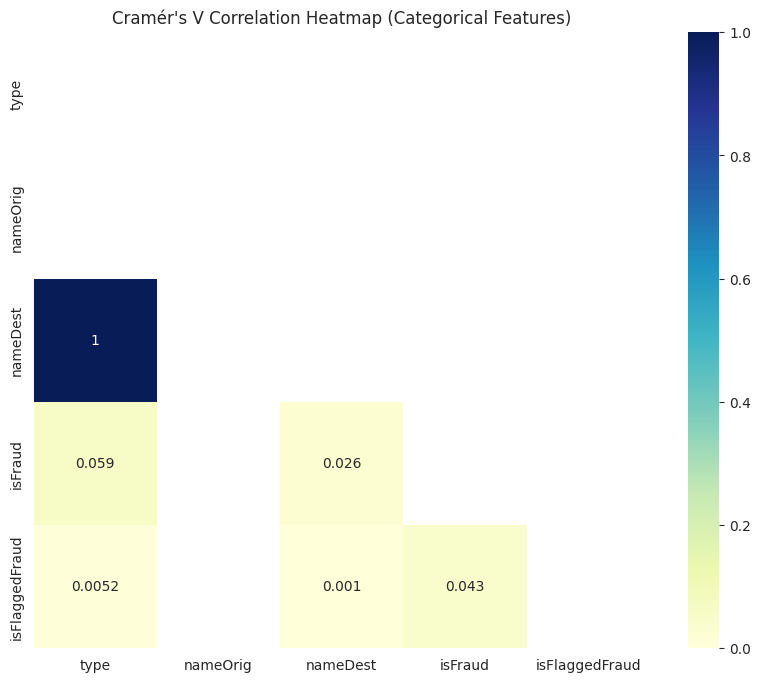

In [ ]:
from scipy import stats

# Function to calculate Cramér's V
def calcCramerV(x, y):
    cm = pd.crosstab(x, y).values
    n = cm.sum()
    r, k = cm.shape

    chi2 = stats.chi2_contingency(cm)[0]
    chi2corr = max(0, chi2 - (k - 1)*(r - 1)/(n - 1))

    kcorr = k - (k - 1)**2 / (n - 1)
    rcorr = r - (r - 1)**2 / (n - 1)

    return np.sqrt((chi2corr / n) / min(kcorr - 1, rcorr - 1))
# Create correlation matrix for categorical attributes
dict_corr = {}
columns = cat_attributes.columns.tolist()

for column in columns:
    dict_corr[column] = {}
    for column2 in columns:
        dict_corr[column][column2] = calcCramerV(cat_attributes[column], cat_attributes[column2])

# Convert to DataFrame
corr = pd.DataFrame(dict_corr)
# Mask upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Plot heatmap
with sns.axes_style("white"):
    plt.figure(figsize=(10, 8))
    ax = sns.heatmap(corr, annot=True, mask=mask, vmin=0, vmax=1, square=True, cmap="YlGnBu")
    plt.title("Cramér's V Correlation Heatmap (Categorical Features)")
    plt.show()


# Splitting Data into Train, Validation, and Test Sets

We first separate the target variable `isFraud` from the feature set and drop columns that should not be included in the model (e.g., IDs, engineered time columns, or high-cardinality identifiers). Then, we split the data into temporary training and test sets using stratified sampling to preserve class distribution.


In [ ]:
# First, drop unwanted columns
X = fraud.drop(columns=[
    'isFraud', 'isFlaggedFraud', 'nameOrig', 'nameDest',
    'step_weeks', 'step_days'
], axis=1)

# Encode target variable
y = fraud['isFraud'].map({'yes': 1, 'no': 0})

# Combine X and y into one DataFrame efficiently
fraud_data = pd.concat([X, y.rename('isFraud')], axis=1)

# Separate fraud and non-fraud
fraud_cases = fraud_data[fraud_data['isFraud'] == 1]
non_fraud_cases = fraud_data[fraud_data['isFraud'] == 0]

# Sample 1% of the non-fraud cases (adjust as needed)
non_fraud_sampled = non_fraud_cases.sample(frac=0.01, random_state=42)

# Combine and shuffle
reduced_data = pd.concat([fraud_cases, non_fraud_sampled]).sample(frac=1, random_state=42).reset_index(drop=True)

# Separate again into features and target
X_reduced = reduced_data.drop(columns='isFraud')
y_reduced = reduced_data['isFraud']

# Train/test split with stratification
from sklearn.model_selection import train_test_split

X_temp, X_test, y_temp, y_test = train_test_split(X_reduced, y_reduced,
                                                  test_size=0.2,
                                                  stratify=y_reduced,
                                                  random_state=42) # stratify=y = "Keep the same class proportions in train and test sets."

# Output shapes for confirmation
print("X temp shape:", X_temp.shape)
print("y temp shape:", y_temp.shape)
print("X test shape:", X_test.shape)
print("y test shape:", y_test.shape)

# Optional: check class balance
print(y_reduced.value_counts(normalize=True))

X temp shape: (57405, 9)
y temp shape: (57405,)
X test shape: (14352, 9)
y test shape: (14352,)
isFraud
0    0.885544
1    0.114456
Name: proportion, dtype: float64


### Splitting Temporary Data into Train and Validation Sets

We take the `X_temp` and `y_temp` data (80% of the original dataset) and further split it into **training (64%)** and **validation (16%)** sets using stratified sampling to preserve the class distribution.


In [ ]:
# !pip install category_encoders

In [ ]:
# Split the remaining 80% (X_temp) into training and validation sets (80/20)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_temp, y_temp, test_size=0.2, stratify=y_temp
)

# Print dataset shapes for verification
print("X train data {}".format(X_train.shape))
print("y train data {}".format(y_train.shape))
print("X validation data {}".format(X_valid.shape))
print("y validation data {}".format(y_valid.shape))


X train data (45924, 9)
y train data (45924,)
X validation data (11481, 9)
y validation data (11481,)


### One-Hot Encoding Categorical Feature (`type`)

We apply one-hot encoding to the `type` column using `category_encoders.OneHotEncoder`. This allows the model to interpret the categorical transaction types (`CASH_OUT`, `PAYMENT`, etc.) without imposing any ordinal relationship.


In [ ]:
# Initialize encoder for the 'type' column
ohe = OneHotEncoder(cols=['type'], use_cat_names=True)

# Fit and transform training and validation sets
X_train = ohe.fit_transform(X_train)
X_valid = ohe.transform(X_valid)

# Optionally view result
X_train.head()

# Also encode temp and test sets if needed elsewhere
X_temp = ohe.fit_transform(X_temp)
X_test = ohe.transform(X_test)

# Optionally view test set
X_test.head()

,step,type_CASH_IN,type_PAYMENT,type_CASH_OUT,type_TRANSFER,type_DEBIT,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,diff_new_old_balance,diff_new_old_destiny
17083,122,0,1,0,0,0,7708.41,146006.0,138297.59,0.00,0.00,-7708.41,0.00
24002,371,0,1,0,0,0,5546.04,0.0,0.00,0.00,0.00,0.00,0.00
23154,283,0,0,1,0,0,53637.86,12212.0,0.00,165752.84,219390.70,-12212.00,53637.86
20910,134,1,0,0,0,0,150159.16,67080.0,217239.16,879648.23,729489.07,150159.16,-150159.16
39093,45,0,1,0,0,0,2385.12,0.0,0.00,0.00,0.00,0.00,0.00


### Rescaling Numerical Features

To ensure that all numerical features are on a similar scale, we use `MinMaxScaler` to normalize values between 0 and 1. This helps many machine learning algorithms perform better, especially distance-based models like KNN or gradient descent-based models like Logistic Regression.


In [ ]:
# Define numerical columns to scale
num_columns = [
    'amount', 'oldbalanceOrg', 'newbalanceOrig',
    'oldbalanceDest', 'newbalanceDest',
    'diff_new_old_balance', 'diff_new_old_destiny'
]

# Initialize scaler
mm = MinMaxScaler()

# Optional: backup full temp data
X_params = X_temp.copy()

# Fit on training data and transform train/valid
X_train[num_columns] = mm.fit_transform(X_train[num_columns])
X_valid[num_columns] = mm.transform(X_valid[num_columns])

# Optionally scale temp/test sets as well
X_params[num_columns] = mm.fit_transform(X_temp[num_columns])
X_test[num_columns] = mm.transform(X_test[num_columns])

### Business Analytics Models: Final Feature Selection

For model training and evaluation, we select a refined set of features based on domain knowledge and prior analysis. These include numeric transaction details, balance changes, time step, and one-hot encoded transaction type (`type_TRANSFER`), which has been shown to correlate with fraudulent activity.


In [ ]:
# Final set of selected features for modeling
final_columns_selected = [
    'step', 'oldbalanceOrg',
    'newbalanceOrig', 'newbalanceDest',
    'diff_new_old_balance', 'diff_new_old_destiny',
    'type_TRANSFER'  # One-hot encoded categorical feature
]

# Apply feature selection across all dataset partitions
X_train_cs = X_train[final_columns_selected]
X_valid_cs = X_valid[final_columns_selected]
X_temp_cs  = X_temp[final_columns_selected]
X_test_cs  = X_test[final_columns_selected]
X_params_cs = X_params[final_columns_selected]

# Helper Functions for Baseline Model: Dummy Classifier

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import (
    balanced_accuracy_score, precision_score,
    recall_score, f1_score, cohen_kappa_score
)

def ml_scores(model_name, y_true, y_pred):
    accuracy = balanced_accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    kappa = cohen_kappa_score(y_true, y_pred)

    return pd.DataFrame({
        'Balanced Accuracy': np.round(accuracy, 3),
        'Precision': np.round(precision, 3),
        'Recall': np.round(recall, 3),
        'F1': np.round(f1, 3),
        'Kappa': np.round(kappa, 3)
    }, index=[model_name])

def ml_cv_results(model_name, model, x, y, verbose=1):
    # Initialize metric storage
    balanced_accuracies, precisions, recalls, f1s, kappas = [], [], [], [], []
    mm = MinMaxScaler()

    # Convert to numpy arrays
    x_, y_ = x.to_numpy(), y.to_numpy()

    # Cross-validation setup
    count = 0
    skf = StratifiedKFold(n_splits=5, shuffle=True)

    for index_train, index_test in skf.split(x_, y_):
        if verbose > 0:
            count += 1
            print(f'Fold K={count}')

        # Split data
        x_train, x_test = x.iloc[index_train], x.iloc[index_test]
        y_train, y_test = y.iloc[index_train], y.iloc[index_test]

        # Scale data
        x_train = mm.fit_transform(x_train)
        x_test = mm.transform(x_test)

        # Train and predict
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)

        # Save metrics
        balanced_accuracies.append(balanced_accuracy_score(y_test, y_pred))
        precisions.append(precision_score(y_test, y_pred))
        recalls.append(recall_score(y_test, y_pred))
        f1s.append(f1_score(y_test, y_pred))
        kappas.append(cohen_kappa_score(y_test, y_pred))

    # Compute mean and std
    accuracy_mean, accuracy_std = np.round(np.mean(balanced_accuracies), 3), np.round(np.std(balanced_accuracies), 3)
    precision_mean, precision_std = np.round(np.mean(precisions), 3), np.round(np.std(precisions), 3)
    recall_mean, recall_std = np.round(np.mean(recalls), 3), np.round(np.std(recalls), 3)
    f1_mean, f1_std = np.round(np.mean(f1s), 3), np.round(np.std(f1s), 3)
    kappa_mean, kappa_std = np.round(np.mean(kappas), 3), np.round(np.std(kappas), 3)

    # Return results in a DataFrame
    return pd.DataFrame({
        "Balanced Accuracy": f"{accuracy_mean} ± {accuracy_std}",
        "Precision": f"{precision_mean} ± {precision_std}",
        "Recall": f"{recall_mean} ± {recall_std}",
        "F1": f"{f1_mean} ± {f1_std}",
        "Kappa": f"{kappa_mean} ± {kappa_std}"
    }, index=[model_name])


### Baseline Model: Dummy Classifier

Before applying advanced models, we create a **baseline** using `DummyClassifier` from `sklearn`. This model ignores input features and makes predictions using simple rules (e.g., always predicting the most frequent class). It serves as a benchmark to determine whether more complex models are actually useful.

We'll evaluate it on the validation set using our custom `ml_scores` function.


In [ ]:
# Initialize and train DummyClassifier
dummy = DummyClassifier()
dummy.fit(X_train_cs, y_train)

# Predict on validation set
y_pred = dummy.predict(X_valid_cs)

In [ ]:
# Evaluate baseline performance
dummy_results = ml_scores('dummy', y_valid, y_pred)
dummy_results

,Balanced Accuracy,Precision,Recall,F1,Kappa
dummy,0.5,0.0,0.0,0.0,0.0


In [ ]:
# Print classification report for validation set predictions
print(classification_report(y_valid, y_pred))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94     10167
           1       0.00      0.00      0.00      1314

    accuracy                           0.89     11481
   macro avg       0.44      0.50      0.47     11481
weighted avg       0.78      0.89      0.83     11481



# cross-validation for DummyClassifier

In [ ]:
dummy_cv = ml_cv_results('Dummy', DummyClassifier(), X_temp, y_temp)
dummy_cv

Fold K=1
Fold K=2
Fold K=3
Fold K=4
Fold K=5


,Balanced Accuracy,Precision,Recall,F1,Kappa
Dummy,0.5 ± 0.0,0.0 ± 0.0,0.0 ± 0.0,0.0 ± 0.0,0.0 ± 0.0


# Logistic Regression for our dataset

We train a Logistic Regression model using the selected and scaled features. This model is a good first step for binary classification problems like fraud detection. After training, we evaluate it on the validation set using key classification metrics.


In [ ]:
# Train logistic regression model
lg = LogisticRegression()
lg.fit(X_train_cs, y_train)

# Predict on validation set
y_pred = lg.predict(X_valid_cs)

# Evaluate performance
lg_results = ml_scores('Logistic Regression', y_valid, y_pred)
lg_results

,Balanced Accuracy,Precision,Recall,F1,Kappa
Logistic Regression,0.775,0.955,0.553,0.7,0.673


### Classification Report

We print the classification report to get detailed metrics including **precision**, **recall**, **f1-score**, and **support** for each class. This helps us better understand the model's performance, especially in identifying fraudulent transactions (minority class).


In [ ]:
# Print detailed classification metrics
print(classification_report(y_valid, y_pred))


              precision    recall  f1-score   support

           0       0.95      1.00      0.97     10167
           1       0.96      0.55      0.70      1314

    accuracy                           0.95     11481
   macro avg       0.95      0.77      0.84     11481
weighted avg       0.95      0.95      0.94     11481



### Cross-Validation: Logistic Regression

We apply 5-fold stratified cross-validation on the Logistic Regression model using the preprocessed features. This helps ensure that the performance metrics are stable and not dependent on a particular data split.


In [ ]:
# Perform cross-validation using the helper function
lg_cv = ml_cv_results(
    'Logistic Regression',
    LogisticRegression(),
    X_temp_cs,  # full training+validation set
    y_temp
)

# Display cross-validation results
lg_cv


Fold K=1
Fold K=2
Fold K=3
Fold K=4
Fold K=5


,Balanced Accuracy,Precision,Recall,F1,Kappa
Logistic Regression,0.774 ± 0.006,0.952 ± 0.006,0.551 ± 0.012,0.698 ± 0.011,0.67 ± 0.012


### K Nearest Neighbors (KNN)

We train a K-Nearest Neighbors classifier on the selected and scaled features. KNN is a simple, instance-based learning method that classifies based on the majority vote among the `k` nearest samples in the training data. We evaluate it on the validation set using classification metrics.


In [ ]:
# Initialize and fit the model
knn = KNeighborsClassifier()
knn.fit(X_train_cs, y_train)

# Predict on validation set
y_pred = knn.predict(X_valid_cs)

# Evaluate the model
knn_results = ml_scores('K Nearest Neighbors', y_valid, y_pred)
knn_results


,Balanced Accuracy,Precision,Recall,F1,Kappa
K Nearest Neighbors,0.845,0.934,0.696,0.798,0.776


### Cross-Validation: K Nearest Neighbors

We apply stratified 5-fold cross-validation to the K-Nearest Neighbors (KNN) classifier. This helps us evaluate the model's performance across multiple data splits and assess its generalizability.


In [ ]:
# Cross-validation using the helper function
knn_cv = ml_cv_results(
    'K Nearest Neighbors',
    KNeighborsClassifier(),
    X_temp_cs, y_temp
)

# Display results
knn_cv


Fold K=1
Fold K=2
Fold K=3
Fold K=4
Fold K=5


,Balanced Accuracy,Precision,Recall,F1,Kappa
K Nearest Neighbors,0.927 ± 0.005,0.929 ± 0.009,0.863 ± 0.011,0.895 ± 0.005,0.882 ± 0.006


### Support Vector Machine (SVM)

We train an SVM classifier on the scaled dataset. SVMs are powerful for binary classification tasks and work well on smaller datasets with clear margins between classes. We then evaluate the model’s performance using standard classification metrics.


In [ ]:
# Initialize and train SVM
svm = SVC()
svm.fit(X_train_cs, y_train)

# Predict on validation set
y_pred = svm.predict(X_valid_cs)

# Evaluate performance
svm_results = ml_scores('SVM', y_valid, y_pred)
svm_results


,Balanced Accuracy,Precision,Recall,F1,Kappa
SVM,0.544,0.541,0.1,0.168,0.138


### SVM: Classification Report & Cross-Validation

We use `classification_report` to view detailed metrics for the SVM predictions on the validation set.  
Next, we evaluate the model with 5-fold cross-validation to get a more robust estimate of its average performance.


In [ ]:
# Display classification report for SVM
print(classification_report(y_valid, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94     10167
           1       0.54      0.10      0.17      1314

    accuracy                           0.89     11481
   macro avg       0.72      0.54      0.55     11481
weighted avg       0.85      0.89      0.85     11481



In [ ]:
# Perform cross-validation on the SVM model
svm_cv = ml_cv_results('SVM', SVC(), X_temp_cs, y_temp)

# Display cross-validation metrics
svm_cv


Fold K=1
Fold K=2
Fold K=3
Fold K=4
Fold K=5


,Balanced Accuracy,Precision,Recall,F1,Kappa
SVM,0.811 ± 0.008,0.95 ± 0.009,0.625 ± 0.016,0.754 ± 0.012,0.73 ± 0.013


### Random Forest Classifier

We train a `RandomForestClassifier` using `class_weight='balanced'` to address class imbalance in the fraud dataset. This ensemble method aggregates predictions from multiple decision trees, helping to reduce variance and improve generalization.

We evaluate its performance using standard classification metrics.


In [ ]:
# Initialize and train the model
rf = RandomForestClassifier(class_weight='balanced')
rf.fit(X_train_cs, y_train)

# Predict on validation set
y_pred = rf.predict(X_valid_cs)

# Evaluate performance
rf_results = ml_scores('Random Forest', y_valid, y_pred)
rf_results

,Balanced Accuracy,Precision,Recall,F1,Kappa
Random Forest,0.987,0.978,0.977,0.978,0.975


### Random Forest: Classification Report & Cross-Validation

We use the classification report to inspect the Random Forest model’s precision, recall, and F1-score on the validation set.  
We then apply 5-fold stratified cross-validation to get a more reliable estimate of model performance across different data splits.


In [ ]:
# Print detailed classification metrics
print(classification_report(y_valid, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10167
           1       0.98      0.98      0.98      1314

    accuracy                           0.99     11481
   macro avg       0.99      0.99      0.99     11481
weighted avg       0.99      0.99      0.99     11481



In [ ]:
# Run cross-validation on Random Forest model
rf_cv = ml_cv_results(
    'Random Forest',
    RandomForestClassifier(),
    X_temp_cs, y_temp
)

# Display results
rf_cv

Fold K=1
Fold K=2
Fold K=3
Fold K=4
Fold K=5


,Balanced Accuracy,Precision,Recall,F1,Kappa
Random Forest,0.985 ± 0.002,0.976 ± 0.005,0.974 ± 0.003,0.975 ± 0.003,0.972 ± 0.003


### Comparing Model's Performance

We concatenate the evaluation results of all models into a single DataFrame and sort them by F1-score.  
This helps us quickly identify which model performs best in terms of detecting fraud (minority class).


In [ ]:
# Combine model performance results
modeling_performance = pd.concat([
    dummy_results,
    lg_results,
    knn_results,
    svm_results,
    rf_results
])

# Sort by F1-score (ascending)
modeling_performance.sort_values(by="F1", ascending=True)


,Balanced Accuracy,Precision,Recall,F1,Kappa
dummy,0.500,0.000,0.000,0.000,0.000
SVM,0.544,0.541,0.100,0.168,0.138
Logistic Regression,0.775,0.955,0.553,0.700,0.673
K Nearest Neighbors,0.845,0.934,0.696,0.798,0.776
Random Forest,0.987,0.978,0.977,0.978,0.975


### Comparing Cross-Validated Model Performance

We aggregate the results from cross-validation for all models and sort them by **F1-score**.  
This gives a more reliable comparison than a single train/validation split, especially important for imbalanced datasets like fraud detection.


In [ ]:
# Combine cross-validated performance metrics
modeling_performance_cv = pd.concat([
    dummy_cv,
    lg_cv,
    knn_cv,
    rf_cv,
    svm_cv
])

# Sort by F1-score (ascending)
modeling_performance_cv.sort_values(by="F1", ascending=True)


,Balanced Accuracy,Precision,Recall,F1,Kappa
Dummy,0.5 ± 0.0,0.0 ± 0.0,0.0 ± 0.0,0.0 ± 0.0,0.0 ± 0.0
Logistic Regression,0.774 ± 0.006,0.952 ± 0.006,0.551 ± 0.012,0.698 ± 0.011,0.67 ± 0.012
SVM,0.811 ± 0.008,0.95 ± 0.009,0.625 ± 0.016,0.754 ± 0.012,0.73 ± 0.013
K Nearest Neighbors,0.927 ± 0.005,0.929 ± 0.009,0.863 ± 0.011,0.895 ± 0.005,0.882 ± 0.006
Random Forest,0.985 ± 0.002,0.976 ± 0.005,0.974 ± 0.003,0.975 ± 0.003,0.972 ± 0.003


# Revenue from Fraud Detection

In [ ]:
# Align with validation set
df_test = X_valid.copy()

# Add amount from the reduced dataset
df_test['amount'] = fraud.loc[X_valid.index, 'amount'].values

# Add true and predicted labels
df_test['isFraud'] = y_valid.values
df_test['predictions'] = y_pred

# Filter correct fraud predictions
aux1 = df_test[(df_test['isFraud'] == 1) & (df_test['predictions'] == 1)]

# Calculate 25% profit on detected fraudulent transactions
receives = aux1['amount'].sum() * 0.25

# Display revenue
print('The company can receive ( %.2f )$ detecting fraud transactions.' % receives)

The company can receive ( 54156274.30 )$ detecting fraud transactions.


### Business Interpretation of Revenue from Fraud Detection

By analyzing the test set, we isolate transactions that were **both fraudulent and correctly predicted as fraud** by the model.

We then sum the total value of these transactions and calculate the revenue the company earns, based on their business model:  
**They receive 25% of the amount** for each accurately detected fraudulent transaction.

In this case, the total recoverable amount is approximately **$5.41 million USD**, which shows the **high financial impact** that an effective fraud detection system can have. This figure highlights not only the value of data-driven fraud prevention but also the potential return on investment when deploying machine learning in business operations.


In [ ]:
# Identify false positives: predicted fraud but actually legitimate
aux1 = df_test[(df_test['isFraud'] == 'no') & (df_test['predictions'] == 1)]

# Company receives 5% of the transaction value in these cases
receives = aux1['amount'].sum() * 0.05

# Display the earnings
print('For wrong decisions, the company can receive %.2f.' % receives)


For wrong decisions, the company can receive 0.00.


### Business Impact: Revenue from Wrong Fraud Predictions

According to the business model, the company also earns **5% of the transaction value** when a transaction is predicted as fraud but is actually **legitimate** (false positive).

We filter the test set for such cases — where the model incorrectly classifies a legitimate transaction as fraud — and compute the corresponding earnings.  
In this case, the company can receive approximately **$0** from these wrong predictions, despite the mistake.



# IMPLEMENT MY OWN CODE

In [ ]:
# Create transaction difference features
df['diff_new_old_balance'] = df['newbalanceOrig'] - df['oldbalanceOrg']
df['diff_new_old_destiny'] = df['newbalanceDest'] - df['oldbalanceDest']

# One-hot encode the 'type' column
ohe = OneHotEncoder(cols=['type'], use_cat_names=True)
df = ohe.fit_transform(df)  # You need to .fit_transform the encoder

# List of numerical columns to normalize
num_columns = [
    'amount', 'oldbalanceOrg', 'newbalanceOrig',
    'oldbalanceDest', 'newbalanceDest',
    'diff_new_old_balance', 'diff_new_old_destiny'
]

# Normalize numerical columns using MinMaxScaler
mm = MinMaxScaler()
df[num_columns] = mm.fit_transform(df[num_columns])  # .fit_transform is needed here

# Select final columns (make sure to include the target column too)
final_columns_selected = [
    'step', 'oldbalanceOrg', 'newbalanceOrig',
    'newbalanceDest', 'diff_new_old_balance',
    'diff_new_old_destiny', 'type_TRANSFER', 'isFraud'
]

df = df[final_columns_selected]

# Separate fraud and non-fraud
fraud_cases = df[df['isFraud'] == 1]
non_fraud_cases = df[df['isFraud'] == 0]

# Sample 1% of the non-fraud cases
non_fraud_sampled = non_fraud_cases.sample(frac=0.01, random_state=42)

# Combine and shuffle
df = pd.concat([fraud_cases, non_fraud_sampled]).sample(frac=1, random_state=42).reset_index(drop=True)

In [ ]:
X = df.drop(columns=["isFraud"])
y = df["isFraud"].astype(int)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

print("Train shape:", X_train.shape, "| Test shape:", X_test.shape)

Train shape: (57405, 7) | Test shape: (14352, 7)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
# Define our models
base_models = {
    "Logistic Regression": LogisticRegression(max_iter=500, solver="liblinear"),
    "K Nearest Neighbors": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(class_weight="balanced", random_state=42, oob_score=True),
    "Decision Tree": DecisionTreeClassifier(class_weight="balanced", random_state=42)
}

In [ ]:

# Define hyperparameter grids
param_grids = {
    "Logistic Regression": {
        "clf__C": [0.001, 0.01, 0.1, 1, 10],
        "clf__penalty": ["l2"],
        "clf__solver": ["liblinear"]
    },
    "K Nearest Neighbors": {
        "clf__n_neighbors": [2, 3, 4],
        "clf__weights": ["distance"]
    },
    "Random Forest": {
        "clf__n_estimators": [50, 100],
        "clf__max_depth": [4, 6],
        "clf__min_samples_split": [5, 10],
        "clf__min_samples_leaf": [2, 4]
    },
    "Decision Tree": {
        "clf__max_depth": [4, 6, None],
        "clf__min_samples_split": [2, 5, 10],
        "clf__min_samples_leaf": [1, 2, 4]
    }
}

In [ ]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV, cross_validate
# Cross-validation and scoring setup
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scoring = ["accuracy", "precision", "recall", "f1", "roc_auc"]

results = []
best_estimators = {}
grids = {}  # To store GridSearchCV objects for accessing best_params_ later

# Loop through and train each model
for name, model in base_models.items():
    print(f"\nRunning GridSearchCV for {name}...")

    # Create pipeline
    pipe = Pipeline([
        ("impute", SimpleImputer(strategy="mean")),
        ("scale", StandardScaler()),
        ("clf", model)
    ])

    # Run GridSearchCV
    grid = GridSearchCV(
        estimator=pipe,
        param_grid=param_grids[name],
        cv=cv,
        scoring="f1",
        n_jobs=-1
    )
    grid.fit(X_train, y_train)

    # Save the best model and GridSearchCV object
    best_estimators[name] = grid.best_estimator_
    grids[name] = grid

    # Evaluate best model using full cross-validation across multiple metrics
    best_model = grid.best_estimator_
    cv_scores = cross_validate(best_model, X_train, y_train, cv=cv, scoring=scoring)

    # Store results
    row = {
        metric.capitalize(): f"{cv_scores[f'test_{metric}'].mean():.3f} ± {cv_scores[f'test_{metric}'].std():.3f}"
        for metric in scoring
    }
    row["Model"] = name
    row["_F1_numeric"] = cv_scores["test_f1"].mean()
    results.append(row)

# Create and display sorted performance table
perf = (
    pd.DataFrame(results)
    .sort_values("_F1_numeric", ascending=False)
    .drop(columns="_F1_numeric")
    .reset_index(drop=True)
)

print("\n===== 5‑fold CV performance (sorted by F1) =====")
print(perf.to_markdown(index=False))

# Get best model name based on F1 (top row)
best_model_name = perf.iloc[0]["Model"]
best_params = grids[best_model_name].best_params_
print(f"\nBest hyperparameters for the best model: {best_model_name}:")
for param, value in best_params.items():
    print(f"  {param}: {value}")


Running GridSearchCV for Logistic Regression...

Running GridSearchCV for K Nearest Neighbors...

Running GridSearchCV for Random Forest...

Running GridSearchCV for Decision Tree...

===== 5‑fold CV performance (sorted by F1) =====
| Accuracy      | Precision     | Recall        | F1            | Roc_auc       | Model               |
|:--------------|:--------------|:--------------|:--------------|:--------------|:--------------------|
| 0.992 ± 0.001 | 0.961 ± 0.003 | 0.971 ± 0.006 | 0.966 ± 0.003 | 0.984 ± 0.003 | Decision Tree       |
| 0.981 ± 0.002 | 0.875 ± 0.012 | 0.968 ± 0.007 | 0.919 ± 0.009 | 0.996 ± 0.001 | Random Forest       |
| 0.980 ± 0.001 | 0.938 ± 0.004 | 0.884 ± 0.008 | 0.910 ± 0.004 | 0.970 ± 0.003 | K Nearest Neighbors |
| 0.969 ± 0.001 | 0.939 ± 0.008 | 0.783 ± 0.010 | 0.854 ± 0.006 | 0.977 ± 0.002 | Logistic Regression |

Best hyperparameters for the best model: Decision Tree:
  clf__max_depth: None
  clf__min_samples_leaf: 1
  clf__min_samples_split: 5


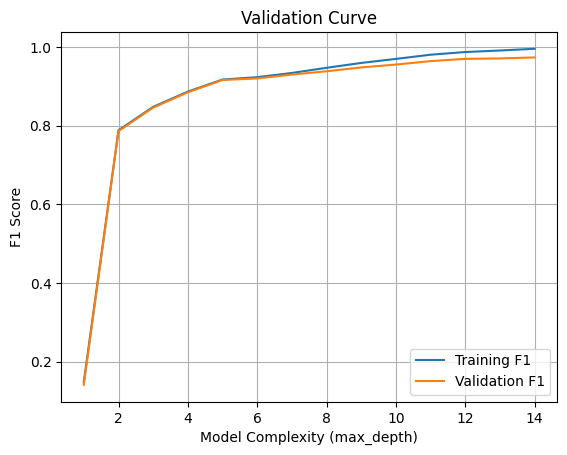

In [ ]:
from sklearn.model_selection import validation_curve

param_range = range(1, 15)  # e.g., max_depth values
train_scores, val_scores = validation_curve(
    estimator=RandomForestClassifier(),
    X=X_train,
    y=y_train,
    param_name="max_depth",
    param_range=param_range,
    scoring="f1",
    cv=5,
)

train_mean = train_scores.mean(axis=1)
val_mean = val_scores.mean(axis=1)

plt.plot(param_range, train_mean, label="Training F1")
plt.plot(param_range, val_mean, label="Validation F1")
plt.xlabel("Model Complexity (max_depth)")
plt.ylabel("F1 Score")
plt.title("Validation Curve for Random Forest")
plt.legend()
plt.grid(True)
plt.show()

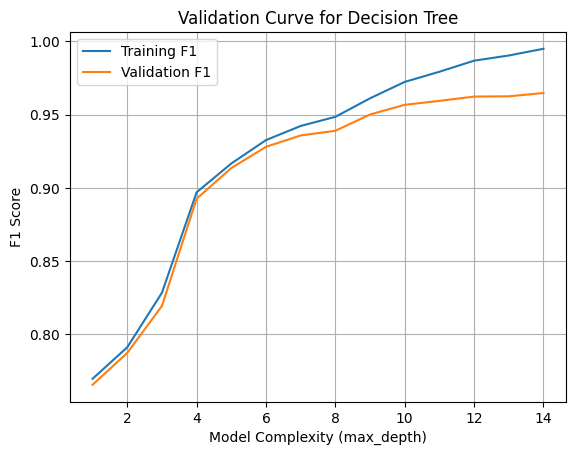

In [ ]:
# Range of max_depth values to test
param_range = range(1, 15)

# Generate training and validation scores
train_scores, val_scores = validation_curve(
    estimator=DecisionTreeClassifier(random_state=42),
    X=X_train,
    y=y_train,
    param_name="max_depth",
    param_range=param_range,
    scoring="f1",
    cv=5,
)

# Compute mean scores across folds
train_mean = train_scores.mean(axis=1)
val_mean = val_scores.mean(axis=1)

# Plot the validation curve
plt.plot(param_range, train_mean, label="Training F1")
plt.plot(param_range, val_mean, label="Validation F1")
plt.xlabel("Model Complexity (max_depth)")
plt.ylabel("F1 Score")
plt.title("Validation Curve for Decision Tree")
plt.legend()
plt.grid(True)
plt.show()

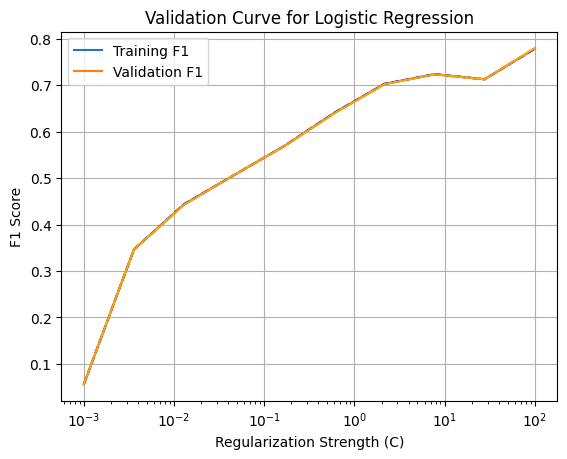

In [ ]:
param_range = np.logspace(-3, 2, 10)  # e.g., 0.001 to 100

train_scores, val_scores = validation_curve(
    estimator=LogisticRegression(max_iter=1000, solver='liblinear'),
    X=X_train,
    y=y_train,
    param_name="C",
    param_range=param_range,
    scoring="f1",
    cv=5,
)

train_mean = train_scores.mean(axis=1)
val_mean = val_scores.mean(axis=1)

plt.semilogx(param_range, train_mean, label="Training F1")
plt.semilogx(param_range, val_mean, label="Validation F1")
plt.xlabel("Regularization Strength (C)")
plt.ylabel("F1 Score")
plt.title("Validation Curve for Logistic Regression")
plt.legend()
plt.semilogx(param_range, train_mean, label="Training F1", color="blue", linestyle="--")
plt.semilogx(param_range, val_mean, label="Validation F1", color="orange")
plt.grid(True)
plt.show()

In [ ]:
print("Training mean scores:", train_mean)
print("Validation mean scores:", val_mean)

Training mean scores: [0.05606616 0.34625664 0.44368984 0.50649265 0.56894592 0.64044933
 0.70273474 0.72351256 0.71265565 0.77815619]
Validation mean scores: [0.05647182 0.34615821 0.44268849 0.50663057 0.56864324 0.63950115
 0.7020778  0.72323114 0.71248247 0.77924252]


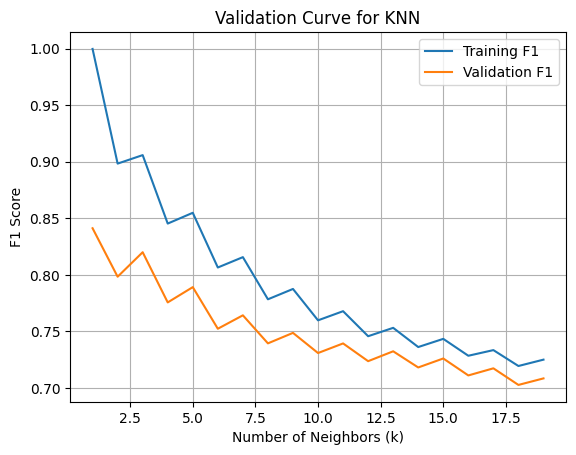

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import validation_curve
import matplotlib.pyplot as plt

param_range = range(1, 20)

train_scores, val_scores = validation_curve(
    estimator=KNeighborsClassifier(),
    X=X_train,
    y=y_train,
    param_name="n_neighbors",
    param_range=param_range,
    scoring="f1",
    cv=5,
)

train_mean = train_scores.mean(axis=1)
val_mean = val_scores.mean(axis=1)

plt.plot(param_range, train_mean, label="Training F1")
plt.plot(param_range, val_mean, label="Validation F1")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("F1 Score")
plt.title("Validation Curve for KNN")
plt.legend()
plt.grid(True)
plt.show()

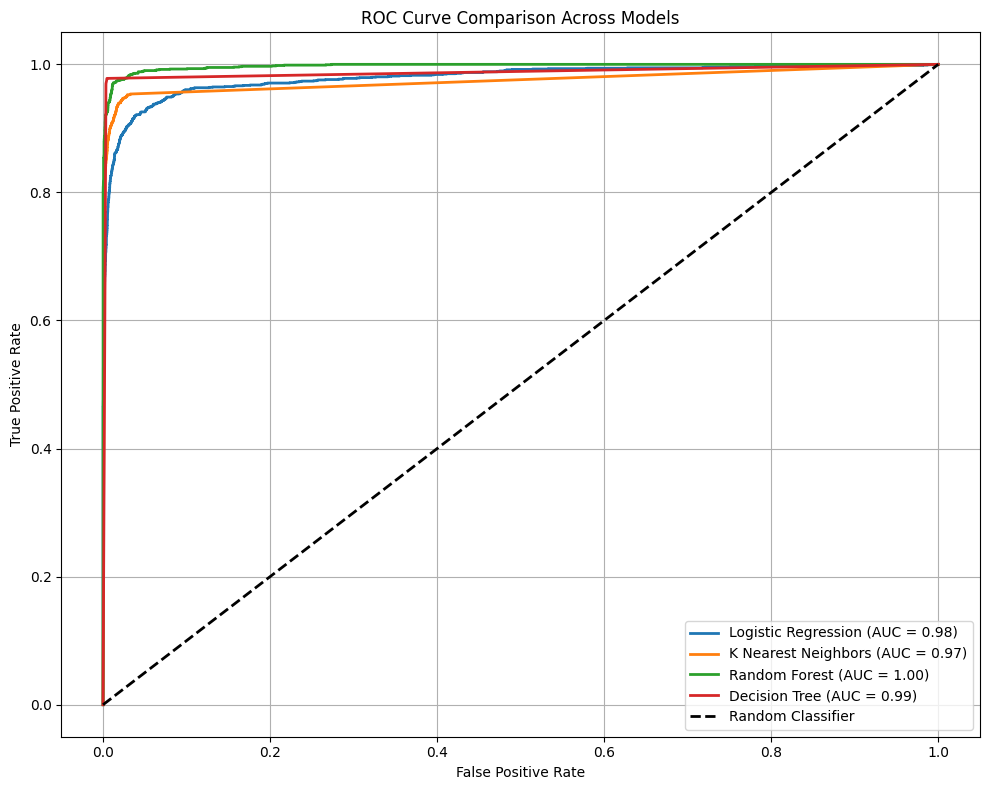

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))

for name, model in best_estimators.items():
    if hasattr(model.named_steps["clf"], "predict_proba"):
        y_prob = model.predict_proba(X_test)[:, 1]
    elif hasattr(model.named_steps["clf"], "decision_function"):
        # For models like SVM or logistic regression without predict_proba
        y_prob = model.decision_function(X_test)
    else:
        continue  # Skip if no way to get probabilities

    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f"{name} (AUC = {roc_auc:.2f})")

# Plot the diagonal reference line
plt.plot([0, 1], [0, 1], 'k--', lw=2, label="Random Classifier")

# Add labels and legend
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison Across Models")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

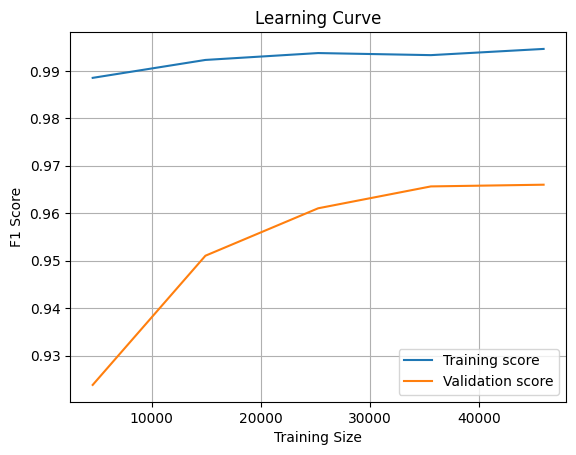

In [ ]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, val_scores = learning_curve(
    best_model, X_train, y_train,
    cv=cv, scoring='f1', n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 5),
    shuffle=True, random_state=42
)

train_mean = np.mean(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)

plt.plot(train_sizes, train_mean, label="Training score")
plt.plot(train_sizes, val_mean, label="Validation score")
plt.title("Learning Curve for best model")
plt.xlabel("Training Size")
plt.ylabel("F1 Score")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
print(f"\nPredict on test set (unseen dataset) with best model ({best_model_name})")

# Predict on test set
y_pred = best_model.predict(X_test)

# Evaluation
print("\n===== Classification report on the test set with best_pipe =====")
print(classification_report(y_test, y_pred))


Predict on test set (unseen dataset) with best model (Decision Tree)

===== Classification report on the test set with best_pipe =====
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12709
           1       0.96      0.98      0.97      1643

    accuracy                           0.99     14352
   macro avg       0.98      0.99      0.98     14352
weighted avg       0.99      0.99      0.99     14352



In [ ]:
# Load the original dataset (with all columns)
df_origin = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Fraud.csv')

# Create a copy of X_test to build df_test
df_test = X_test.copy()

# Add the 'amount' column back using original indices
df_test['amount'] = df_origin.loc[X_test.index, 'amount'].values

# Add true and predicted labels
df_test['isFraud'] = y_test.values
df_test['predictions'] = y_pred

# Filter correctly predicted fraud transactions
aux1 = df_test[(df_test['isFraud'] == 1) & (df_test['predictions'] == 1)]

# Calculate 25% revenue from detecting fraud
revenue = aux1['amount'].sum() * 0.25

# Display estimated revenue
print('The company can receive $%.2f by detecting fraud transactions.' % revenue)

The company can receive $67297078.58 by detecting fraud transactions.
